In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("Ecommerce_Product_Data_Cleaned.csv")
df.head(2)

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,cost_of_the_product_cleaned,discount_offered_cleaned,weight_in_gms_cleaned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium_cost,Too Much,Light
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium_cost,Too Much,Heavy


In [58]:
def get_one_hot_encoding(df, cols_list):
    for col in cols_list:
        df = pd.concat([df.drop(col, axis=1),
                        pd.get_dummies(df[col], prefix=col,
                                       drop_first=True, dtype=int)],
                       axis=1)
    
    return df

In [59]:
df_ohe = get_one_hot_encoding(df, ['warehouse_block','mode_of_shipment','product_importance','gender','cost_of_the_product_cleaned',
       'discount_offered_cleaned', 'weight_in_gms_cleaned' ])
df_ohe.head(2)

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n,warehouse_block_B,warehouse_block_C,...,product_importance_low,product_importance_medium,gender_M,cost_of_the_product_cleaned_Medium_cost,cost_of_the_product_cleaned_low_cost,discount_offered_cleaned_Normal,discount_offered_cleaned_Too Much,weight_in_gms_cleaned_Light,weight_in_gms_cleaned_Medium,weight_in_gms_cleaned_Very Heavy
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,0,1,0,0,1,1,0,0
1,2,4,5,216,2,59,3088,1,0,0,...,1,0,1,1,0,0,1,0,0,0


In [60]:
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned', 'weight_in_gms_cleaned'],
      dtype='object')

## RandomForestClassifier

In [61]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint




In [62]:
df_ohe.columns

Index(['id', 'customer_care_calls', 'customer_rating', 'cost_of_the_product',
       'prior_purchases', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'warehouse_block_B', 'warehouse_block_C',
       'warehouse_block_D', 'warehouse_block_F', 'mode_of_shipment_Road',
       'mode_of_shipment_Ship', 'product_importance_low',
       'product_importance_medium', 'gender_M',
       'cost_of_the_product_cleaned_Medium_cost',
       'cost_of_the_product_cleaned_low_cost',
       'discount_offered_cleaned_Normal', 'discount_offered_cleaned_Too Much',
       'weight_in_gms_cleaned_Light', 'weight_in_gms_cleaned_Medium',
       'weight_in_gms_cleaned_Very Heavy'],
      dtype='object')

In [63]:
X = df_ohe[['customer_care_calls', 'customer_rating', 'cost_of_the_product',
       'prior_purchases', 'discount_offered', 'weight_in_gms',
        'warehouse_block_B', 'warehouse_block_C',
       'warehouse_block_D', 'warehouse_block_F', 'mode_of_shipment_Road',
       'mode_of_shipment_Ship', 'product_importance_low',
       'product_importance_medium', 'gender_M',
       'cost_of_the_product_cleaned_Medium_cost','discount_offered_cleaned_Too Much',
       'weight_in_gms_cleaned_Light', 'weight_in_gms_cleaned_Medium',
       'weight_in_gms_cleaned_Very Heavy',
       'cost_of_the_product_cleaned_low_cost' ]]

y = df_ohe['reached.on.time_y.n']



In [64]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=5)

In [65]:
print('Training Data Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Data Shape: (8799, 21)
Training Labels Shape: (8799,)
Testing Data Shape: (2200, 21)
Testing Labels Shape: (2200,)


In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=2023,
                               max_features=10, max_depth=8,
                               min_samples_split=int(X_train.shape[0]/10),
                               bootstrap=True, oob_score=True
                              )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_split=879,
                       n_estimators=500, oob_score=True, random_state=2023)

In [67]:
y_pred = model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6818181818181818


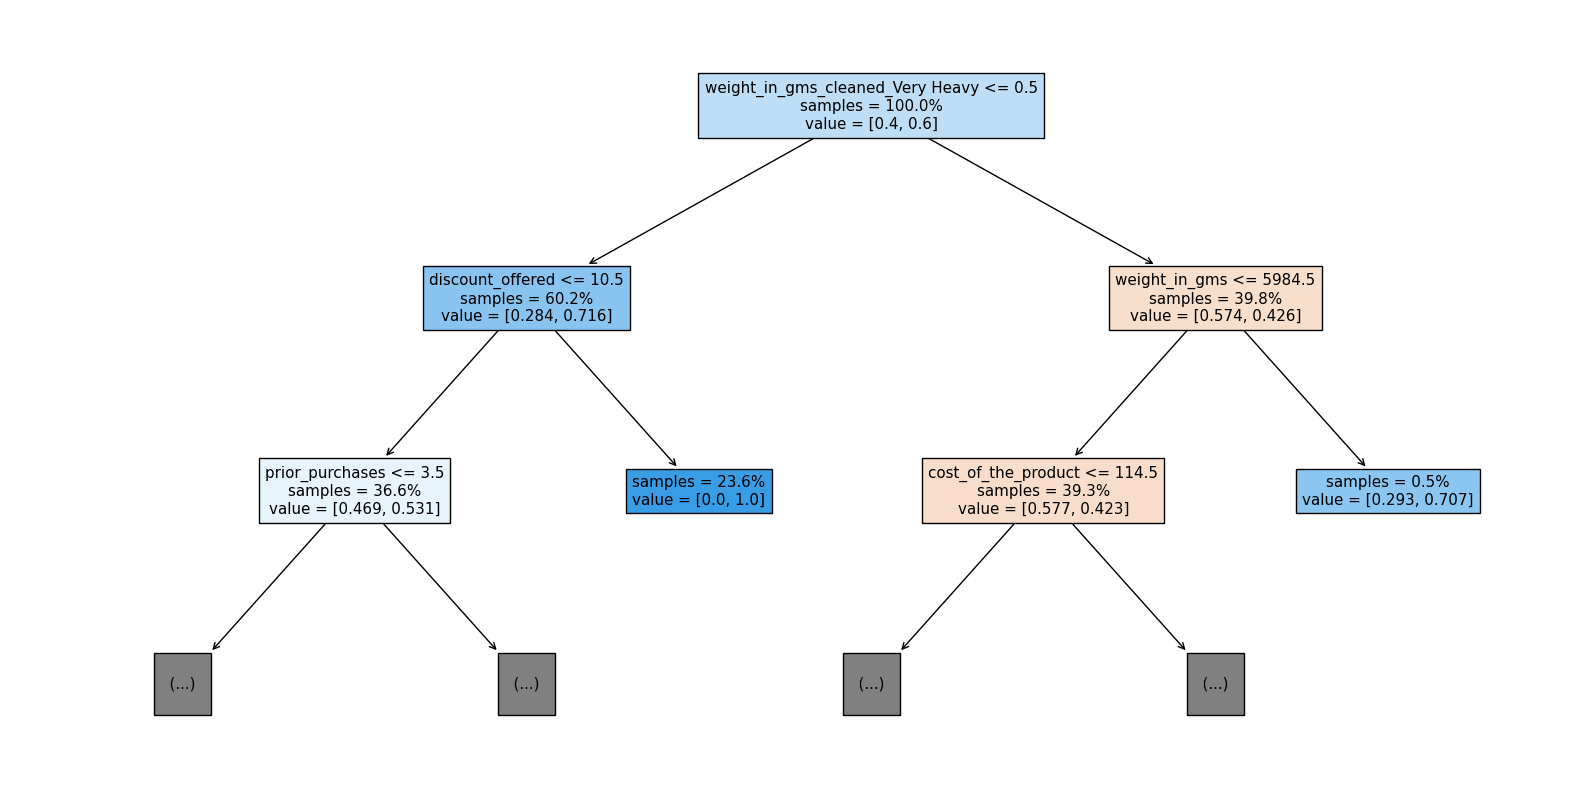

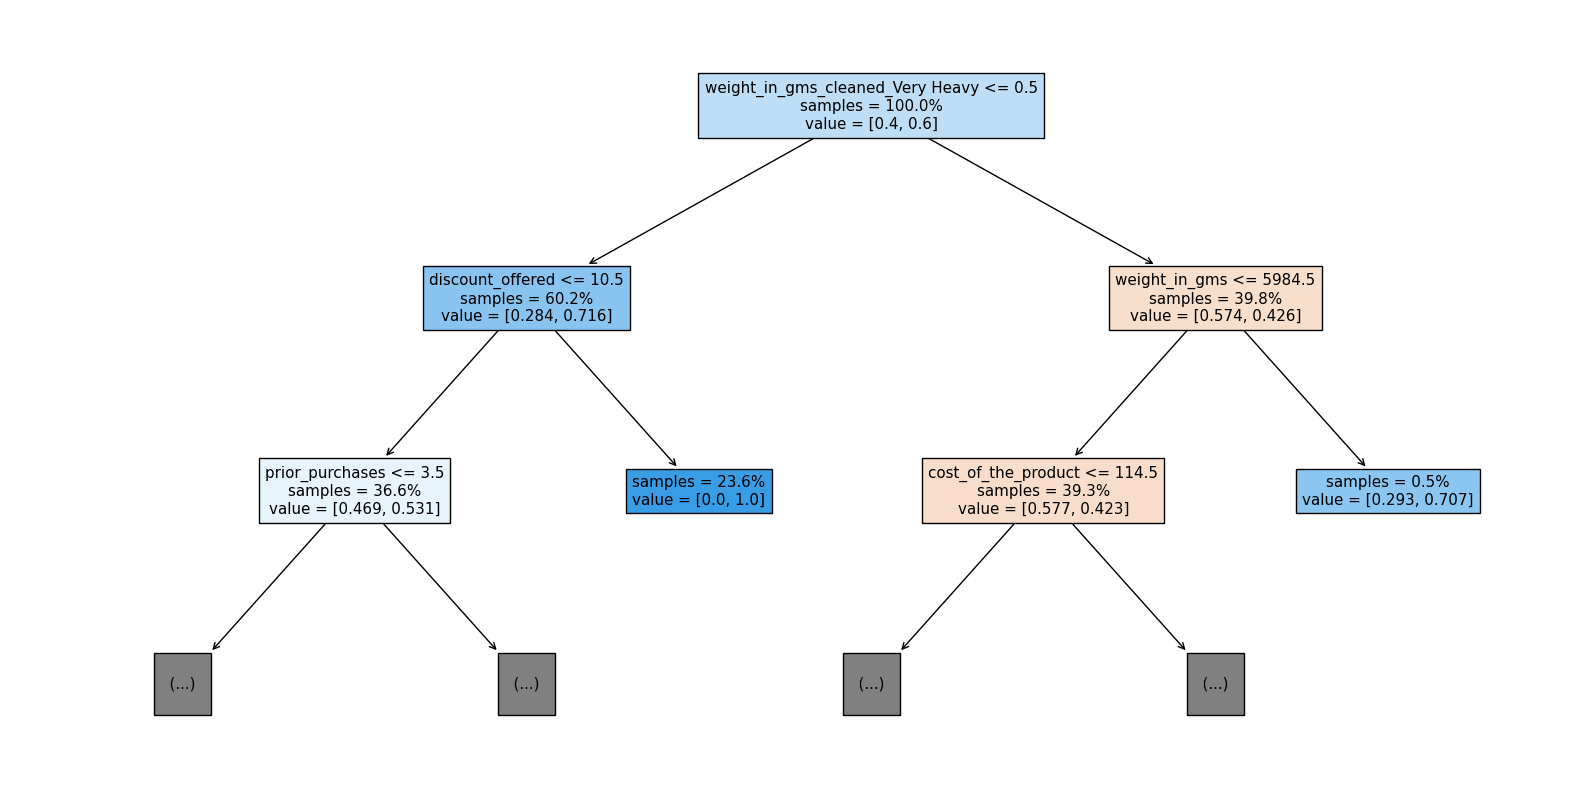

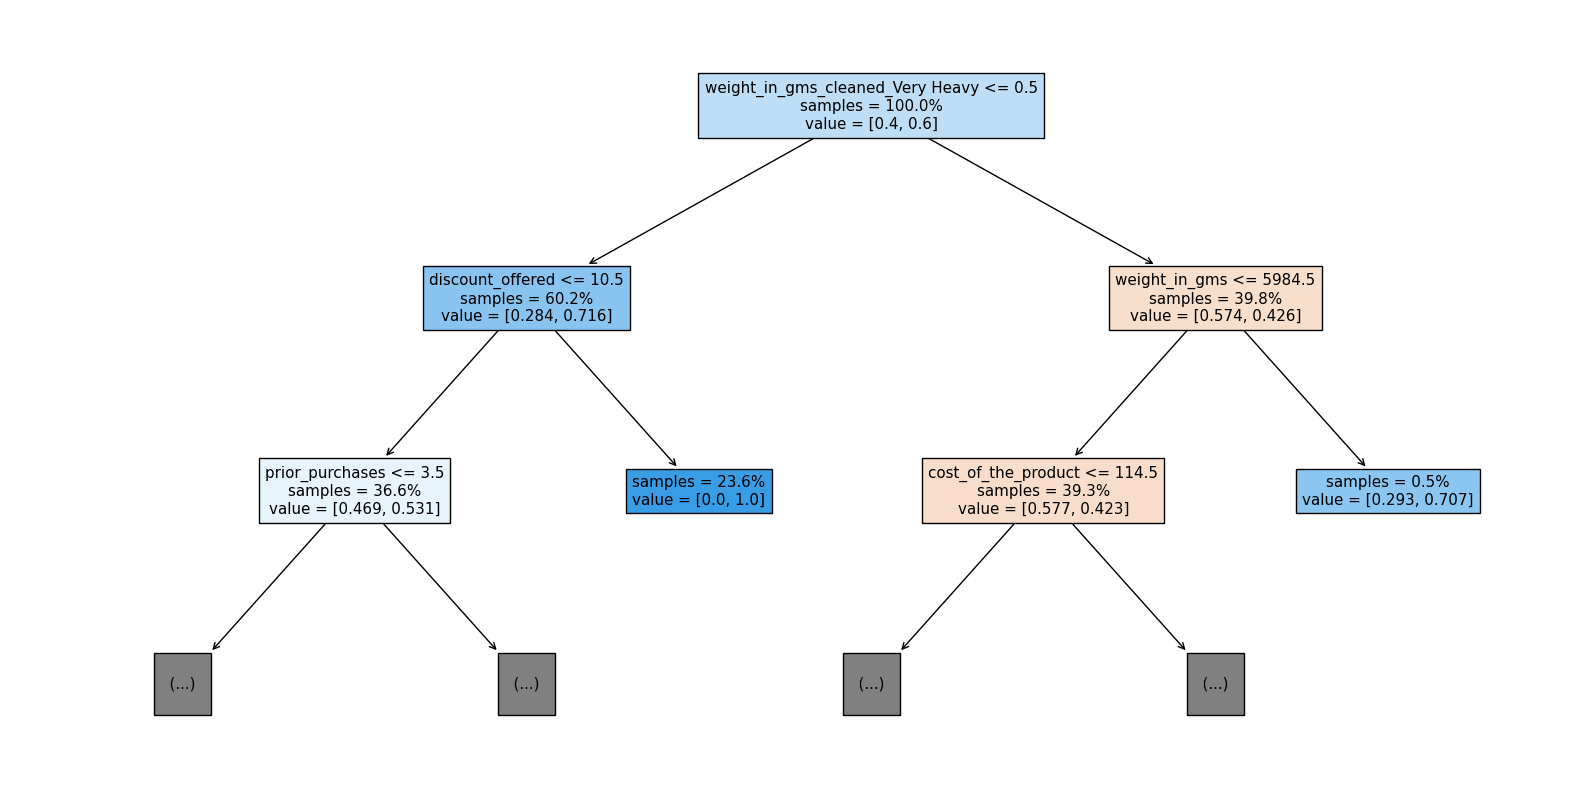

In [69]:

from sklearn.tree import plot_tree

# Iterate over the first 3 trees in the random forest
for i in range(3):
    tree = model.estimators_[20]  # Access the i-th tree from the random forest
    
    # Plot the tree using matplotlib
    plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
    plot_tree(tree, 
              feature_names=X_train.columns,  # The feature names
              filled=True,  # Color the nodes based on class
              max_depth=2,  # Set max depth for visualization
              impurity=False,  # Don't show the impurity
              proportion=True)  # Show the proportion of samples in each node
    plt.show()  # Display the plot

In [70]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
model= RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(model, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002271E244860>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002271F3A39B0>})

In [71]:
est_model = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 350}


# DECISION TREE

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

In [148]:
dtree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

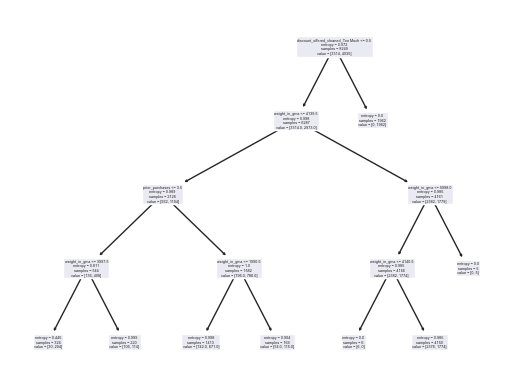

In [150]:
tree.plot_tree(dtree, feature_names=X_train.columns)

plt.show()

In [151]:
train_acc = dtree.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 68.0567341495939


In [152]:
y_pred = dtree.predict(X_test)
probs = dtree.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 69.16363636363636


### Check the confusion matrix

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71      1122
           1       0.93      0.52      0.67      1628

    accuracy                           0.69      2750
   macro avg       0.75      0.73      0.69      2750
weighted avg       0.78      0.69      0.69      2750



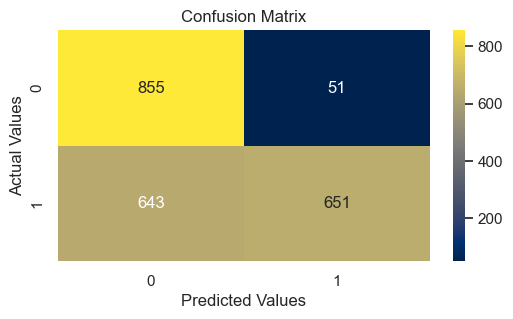

In [114]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='cividis')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Plot ROC curve

In [154]:
from sklearn.metrics import roc_curve, auc

In [155]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

In [156]:
train_fpr, train_tpr, threshold = roc_curve(y_train, dtree.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)

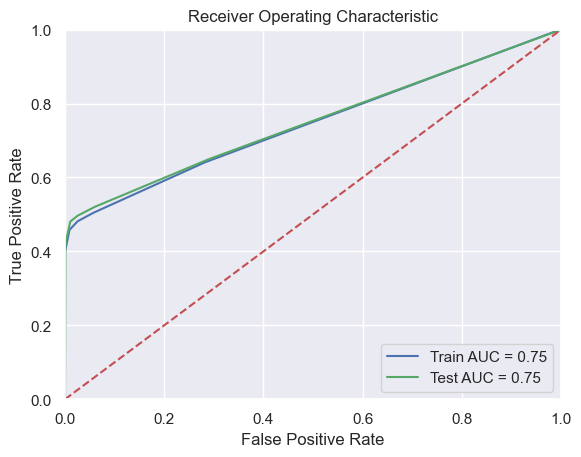

In [157]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00053918, 0.00094082, 0.00198366, 0.00918324,
       0.01081604, 0.21251089])

In [120]:
accuracy_train, accuracy_test = [], []
for alpha in alphas:
    dtree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=2023)
    dtree.fit(X_train, y_train)
    
    y_train_pred = dtree.predict(X_train)
    y_test_pred = dtree.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    accuracy_train.append(train_acc)
    accuracy_test.append(test_acc)

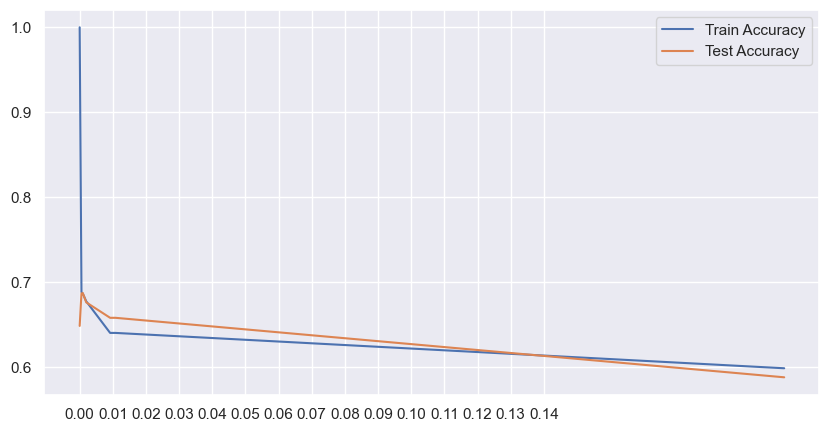

In [121]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 5))
sns.lineplot(y=accuracy_train, x=alphas, label='Train Accuracy')
sns.lineplot(y=accuracy_test, x=alphas, label='Test Accuracy')
plt.xticks(ticks = np.arange(0, 0.15, 0.01));

# LOGISTIC REGREEESION

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5)

In [124]:
X_train.shape

(8799, 21)

In [125]:
y_train.shape

(8799,)

In [272]:
X_test.shape

(2200, 21)

In [126]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
pd.DataFrame({'feature': model.feature_names_in_.tolist(), 'coef': model.coef_[0].tolist()})

,feature,coef
0,customer_care_calls,-0.174029
1,customer_rating,0.065223
2,cost_of_the_product,0.000513
3,prior_purchases,-0.046907
4,discount_offered,0.088796
5,weight_in_gms,-0.000096
6,warehouse_block_B,0.023997
7,warehouse_block_C,0.048592
8,warehouse_block_D,0.088487
9,warehouse_block_F,0.169367


In [128]:
model.intercept_

array([0.19508554])

In [129]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 65.16649619274918


In [130]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 65.4090909090909


In [131]:
y_pred_probs

array([0.98981835, 0.38374482, 0.99861643, ..., 0.9985899 , 0.31618562,
       0.64764312])

### Check the accuracy of the trained model on training and test dataset


In [132]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [133]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 65.1594132622136


In [134]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 65.38181818181819


In [135]:
y_pred_probs

array([0.62945798, 0.52128637, 0.54250087, ..., 0.51182071, 0.60807275,
       0.50144422])

### Check the confusion matrix

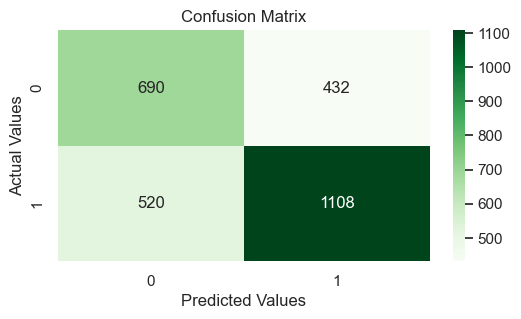

In [136]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Plot ROC curve

In [284]:
from sklearn.metrics import roc_curve, auc

In [285]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

In [137]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)

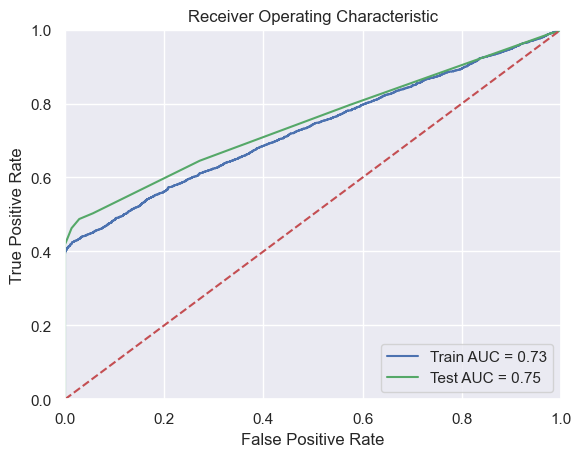

In [138]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [141]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 703,  419],
       [ 522, 1106]], dtype=int64)

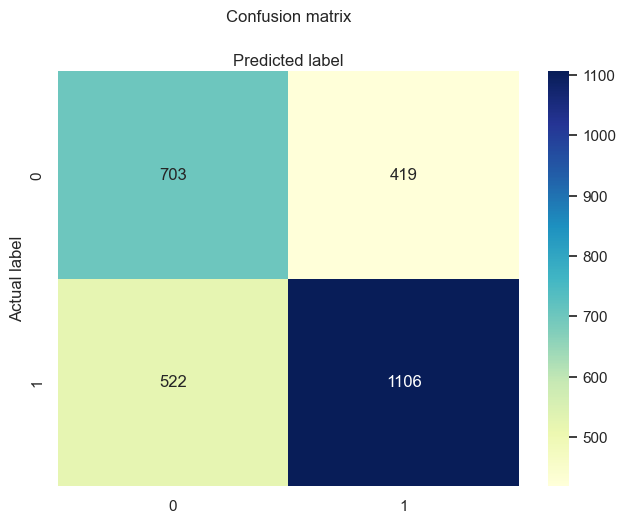

In [290]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');



In [143]:
from sklearn.metrics import classification_report
df= ['reached.on.time_y.n']
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1122
           1       0.73      0.68      0.70      1628

    accuracy                           0.66      2750
   macro avg       0.65      0.65      0.65      2750
weighted avg       0.66      0.66      0.66      2750



In [144]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 65.1594132622136


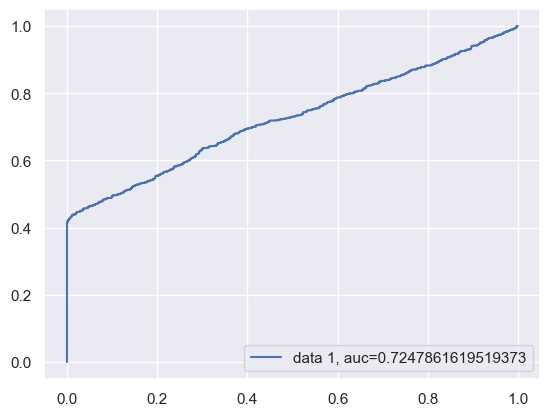

In [145]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [160]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fitting and Evaluating the Model

In [161]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [162]:
y_pred = knn.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6468181818181818


### Using Cross Validation to Get the Best Value of k

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
k_values = [i for i in range (1,30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

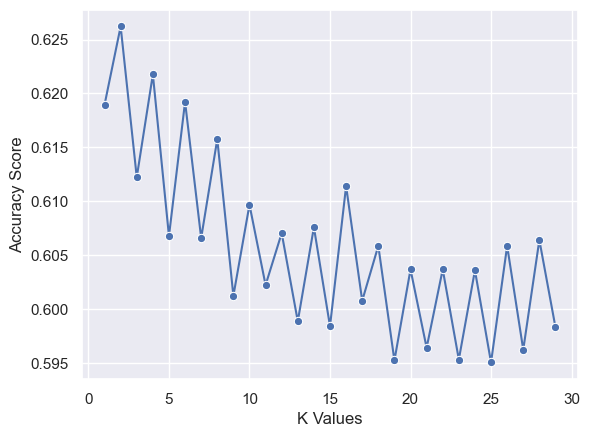

In [301]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [302]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [303]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.644090909090909
Precision: 0.7993235625704622
Recall: 0.5395738203957382


# Neural Network

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assume 'X_train' is your feature matrix and 'y_train' is your target (binary classification)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

C:\Users\Sakshi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6275 - loss: 0.5802
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6668 - loss: 0.5169
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6871 - loss: 0.5044
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6842 - loss: 0.5077
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6897 - loss: 0.5014
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6859 - loss: 0.5076
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6992 - loss: 0.4995
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6991 - loss: 0.4959
Epoch 9/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6937 - loss: 0.5029
Epoch 10/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7018 - loss: 0.4942


In [305]:
predictions = model.predict(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [306]:

# If you want to convert the probabilities to class labels (0 or 1):
y_pred = (predictions > 0.5).astype(int)

print("Predicted probabilities:", predictions)
print("Predicted class labels:", y_pred)

Predicted probabilities: [[0.4786263 ]
 [0.33584833]
 [0.35170633]
 ...
 [0.4303409 ]
 [0.48664796]
 [0.39598447]]
Predicted class labels: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
